In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

In [2]:
df = pd.read_excel(r"C:\Users\HP\Downloads\Documents\Hydrological Machine Learning Dataset.xlsx")

In [3]:
df.head()

,POINTS,Area(ha),Lov(m),H1(m),H2(m),Lch(m),H3(m),N,Sov,Sch,Tov(mins),Tch(mins),Tc(mins),Runoff Coefficient(C),I 25yr(mm/hr),I 50yr(mm/hr),I 100yr(mm/hr),Q 25yr,Q 50yr,Q 100yr
0,ISU-NJABA/EZIAMA ROAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PT_A_1,12.906,66.065,197.667,195.618,1762.0,150.234,0.3,0.03101,0.02576,13.13971,25.19207,38.33,0.34,168.0,192.0,220.0,2.05,2.34,2.68
2,PT_A_2,13.655,40.667,198.252,197.564,2029.0,150.977,0.3,0.01692,0.02296,12.07905,29.35374,41.43,0.34,158.0,181.0,210.0,2.04,2.33,2.71
3,PT_A_3,4.633,51.594,198.138,197.548,1509.0,121.120,0.3,0.01144,0.05065,14.80037,17.23330,32.03,0.34,183.0,210.0,235.0,0.80,0.92,1.03
4,PT_A_4_L,8.959,147.600,194.027,190.103,488.3,172.002,0.3,0.02659,0.03707,19.83127,8.15178,27.98,0.34,200.0,222.0,249.0,1.69,1.88,2.11


In [5]:
df.tail()

,POINTS,Area(ha),Lov(m),H1(m),H2(m),Lch(m),H3(m),N,Sov,Sch,Tov(mins),Tch(mins),Tc(mins),Runoff Coefficient(C),I 25yr(mm/hr),I 50yr(mm/hr),I 100yr(mm/hr),Q 25yr,Q 50yr,Q 100yr
19,PT_E_2,45.996,40.667,198.249,197.571,1316.00,164.87,0.3,0.01667,0.02485,12.12068,20.40231,32.52,0.34,180.0,205.0,230.0,7.82,8.91,9.99
20,PT_E_3,14.997,58.610,198.210,196.480,689.62,177.25,0.3,0.02952,0.02789,12.57053,11.86556,24.44,0.34,215.0,235.0,260.0,3.05,3.33,3.68
21,AMAUJU UMUDURU ROAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,PT_F_1,9.866,43.924,198.153,197.549,602.98,178.47,0.3,0.01375,0.03165,13.14653,10.19164,23.34,0.34,220.0,240.0,265.0,2.05,2.24,2.47
23,PT_F_2,21.490,40.667,198.252,197.564,680.10,183.53,0.3,0.01692,0.02064,12.07905,13.18122,25.26,0.34,210.0,233.0,259.0,4.26,4.73,5.26


In [4]:
df_clean=df.dropna()

In [5]:
features = ['Area(ha)', 'Lov(m)', 'Tc(mins)', 'Runoff Coefficient(C)', 'Sov', 'I 25yr(mm/hr)']
X = df_clean[features]
y = df_clean['Q 25yr']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
xgb_model = XGBRegressor(
    n_estimators=500,      
    learning_rate=0.05,     
    max_depth=6,            
    subsample=0.8,          
    colsample_bytree=0.8,   
    random_state=42,
    objective="reg:squarederror"   
)


In [13]:
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.2162
Root Mean Squared Error (RMSE): 0.2518
R² Score: 0.9298


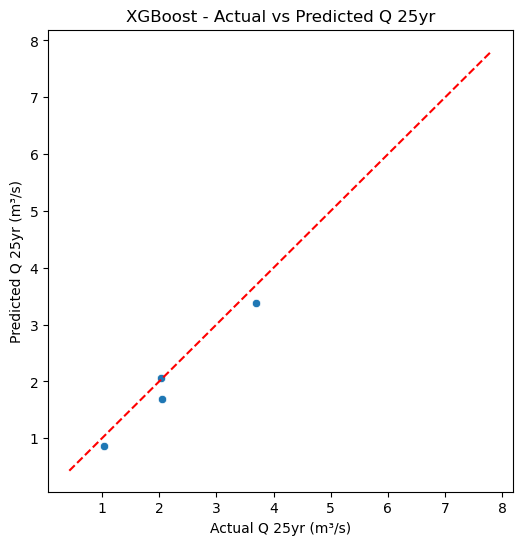

In [15]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Q 25yr (m³/s)')
plt.ylabel('Predicted Q 25yr (m³/s)')
plt.title('XGBoost - Actual vs Predicted Q 25yr')
plt.show()


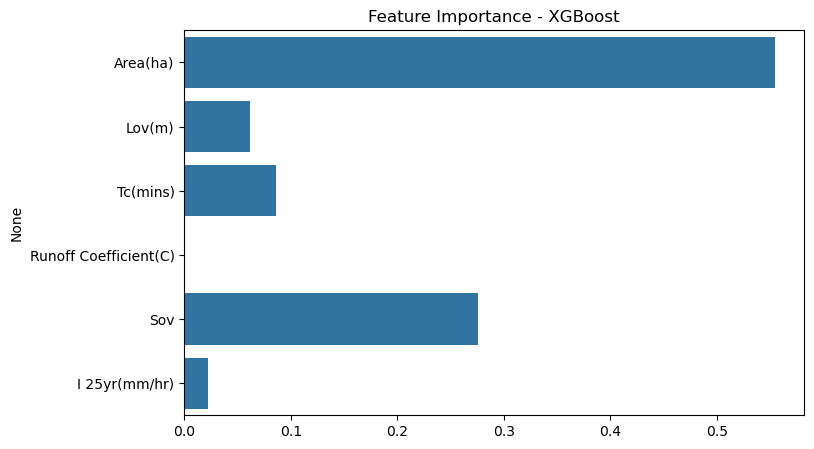

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title("Feature Importance - XGBoost")
plt.show()